## <span style="color:green"> Laboratorio di simulazione numerica </span>
### Martina Colombo, 977556
## <span style="color:blue">  Esercitazione 7</span>

In [4]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from IPython.display import HTML

In [5]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

#### Introduzione

In questa esercitazione abbiamo a disposizione due codici diversi che simulano entrambi un insieme di $N=108$ particelle interagenti tramite un potenziale di tipo Lennard-Jones. Il primo è il codice di dinamica molecolare utilizzato nell'esercitazione $4$, il secondo è un codice di tipo Monte Carlo che utilizza l'algoritmo di Metropolis per campionare le configurazioni del sistema nell'ensemble canonico. 

### Esercizio 07.1

Nel primo esercizio ci viene richiesto di utilizzare il codice Monte Carlo per stampare i valori istantanei dell'energia potenziale per particella $U/N$ e della pressione $P$ per un sistema equilibrato in tre diverse condizioni termodinamiche:

- Fase solida: densità $\rho^\star = 1.1$, temperatura $T^\star = 0.8$, raggio di cut-off $r_c = 2.2$
- Fase liquida: densità $\rho^\star = 0.8$, temperatura $T^\star = 1.1$, raggio di cut-off $r_c = 2.5$
- Fase gassosa: densità $\rho^\star = 0.05$, temperatura $T^\star = 1.2$, raggio di cut-off $r_c = 5.0$

N.B: sia nel codice di dinamica molecolare e sia nel codice Monte Carlo aggiungiamo al calcolo di energia potenziale e pressione le correzioni di coda.  

La pressione nei sistemi di tipo Lennard-Jones è calcolata tramite il teorema del viriale come:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

Dopo aver fissato il rate di accettazione dell'algoritmo Metropolis intorno al $50\%$ riportiamo di seguito i valori istantanei dell'energia per particella e della pressione in funzione del numero di passi effettuati durante la simulazione nelle tre fasi analizzate. N.B: i valori della pressione e dell'energia potenziale sono riportati in unità di Lennard-Jones.

Facciamo una prima simulazione con $M=5000$ passi Monte Carlo per i tre tipi di stato. Per la simulazione dello stato solido scegliamo come configurazione iniziale quella di un reticolo $fcc$. Osservando i risultati dei valori istantanei vediamo che inizialmente il sistema ci mette del tempo ad equilibrare, in particolare necessita di alcune decine di step Monte Carlo prima di oscillare intorno ad un valore costante. Decidiamo quindi di effettuare una seconda simulazione dove prendiamo come configurazione iniziale quella finale ottenuta dalla precedente simulazione che utilizzava il reticolo $fcc$. Come possiamo osservare dai grafici di seguito il sistema risulta in questo modo equilibrato fin dai primi step della simulazione.

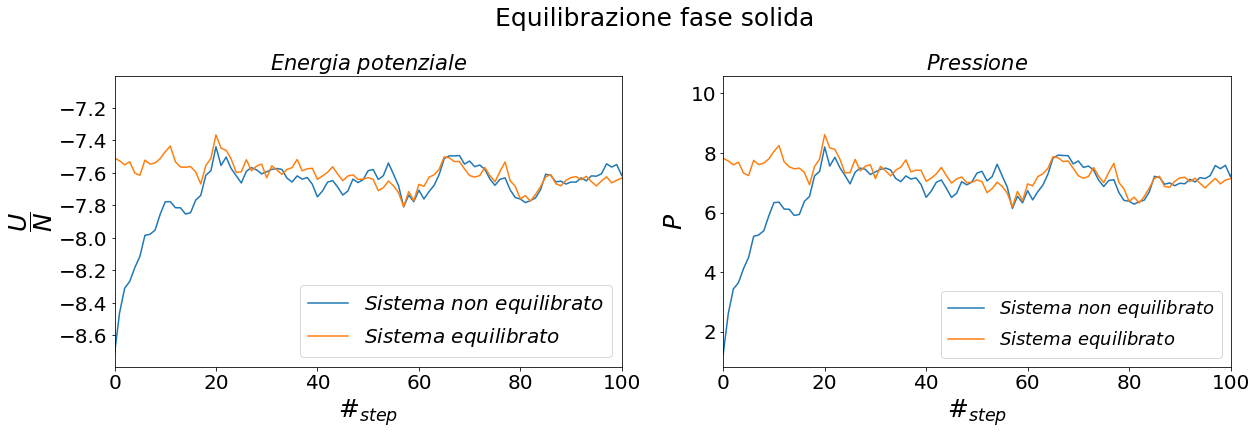

In [191]:
plt.figure(figsize=(20,12))

epot = np.loadtxt("MonteCarlo_NVT/Solido/instant_epot_neq.dat", usecols=(0), delimiter=' ', unpack='true')
press = np.loadtxt("MonteCarlo_NVT/Solido/instant_press_neq.dat", usecols=(0), delimiter=' ', unpack='true')
epot_eq = np.loadtxt("MonteCarlo_NVT/Solido/instant_epot_eq.dat", usecols=(0), delimiter=' ', unpack='true')
press_eq = np.loadtxt("MonteCarlo_NVT/Solido/instant_press_eq.dat", usecols=(0), delimiter=' ', unpack='true')
x=np.arange(len(epot_eq))
x_neq=np.arange(len(epot))
y=np.arange(len(press_eq))
y_neq=np.arange(len(epot))

plt.subplot(2,2,1)

plt.title('$Energia$ $potenziale$', fontsize=21)
plt.plot(x_neq, epot, label='$Sistema$ $non$ $equilibrato$')
plt.plot(x, epot_eq, label='$Sistema$ $equilibrato$')
plt.xlim(0,100)
plt.xlabel("$\#_{step}$", fontsize=25)
plt.ylabel('$\\dfrac{U}{N}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='best', fontsize=20)

plt.subplot(2,2,2)

plt.title('$Pressione$', fontsize=21)
plt.plot(y_neq,press, label='$Sistema$ $non$ $equilibrato$')
plt.plot(y,press_eq, label='$Sistema$ $equilibrato$')
plt.xlim(0,100)
plt.xlabel("$\#_{step}$", fontsize=25)
plt.ylabel('$P$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.3)

plt.legend(loc='lower right', fontsize=18)

plt.suptitle("Equilibrazione fase solida", fontsize=25)

plt.show()

Utilizziamo questa tecnica per equilibrare il sistema anche nelle altre configurazioni termodinamiche. Per le prime simulazioni di equilibrazione per lo stato liquido e gassoso scegliamo come configurazione iniziale della fase liquida la configurazione finale dello stato solido e come configurazione iniziale della fase gassosa quella finale ottenuta dalla simulazione dello stato liquido.

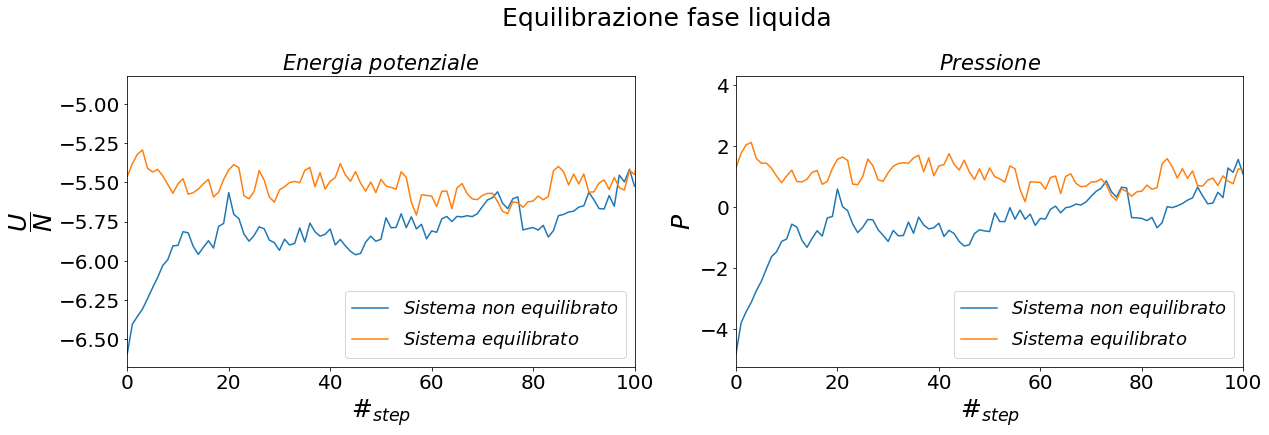

In [193]:
plt.figure(figsize=(20,12))

epot = np.loadtxt("MonteCarlo_NVT/Liquido/instant_epot_neq.dat", usecols=(0), delimiter=' ', unpack='true')
press = np.loadtxt("MonteCarlo_NVT/Liquido/instant_press_neq.dat", usecols=(0), delimiter=' ', unpack='true')
epot_eq = np.loadtxt("MonteCarlo_NVT/Liquido/instant_epot_eq.dat", usecols=(0), delimiter=' ', unpack='true')
press_eq = np.loadtxt("MonteCarlo_NVT/Liquido/instant_press_eq.dat", usecols=(0), delimiter=' ', unpack='true')
x=np.arange(len(epot_eq))
x_neq=np.arange(len(epot))
y=np.arange(len(press_eq))
y_neq=np.arange(len(epot))

plt.subplot(2,2,1)

plt.title('$Energia$ $potenziale$', fontsize=21)
plt.plot(x_neq, epot, label='$Sistema$ $non$ $equilibrato$')
plt.plot(x, epot_eq, label='$Sistema$ $equilibrato$')
plt.xlim(0,100)
plt.xlabel("$\#_{step}$", fontsize=25)
plt.ylabel('$\\dfrac{U}{N}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='lower right', fontsize=18)

plt.subplot(2,2,2)

plt.title('$Pressione$', fontsize=21)
plt.plot(y_neq,press, label='$Sistema$ $non$ $equilibrato$')
plt.plot(y,press_eq, label='$Sistema$ $equilibrato$')
plt.xlim(0,100)
plt.xlabel("$\#_{step}$", fontsize=25)
plt.ylabel('$P$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='lower right', fontsize=18)

plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.3)

plt.suptitle("Equilibrazione fase liquida", fontsize=25)

plt.show()

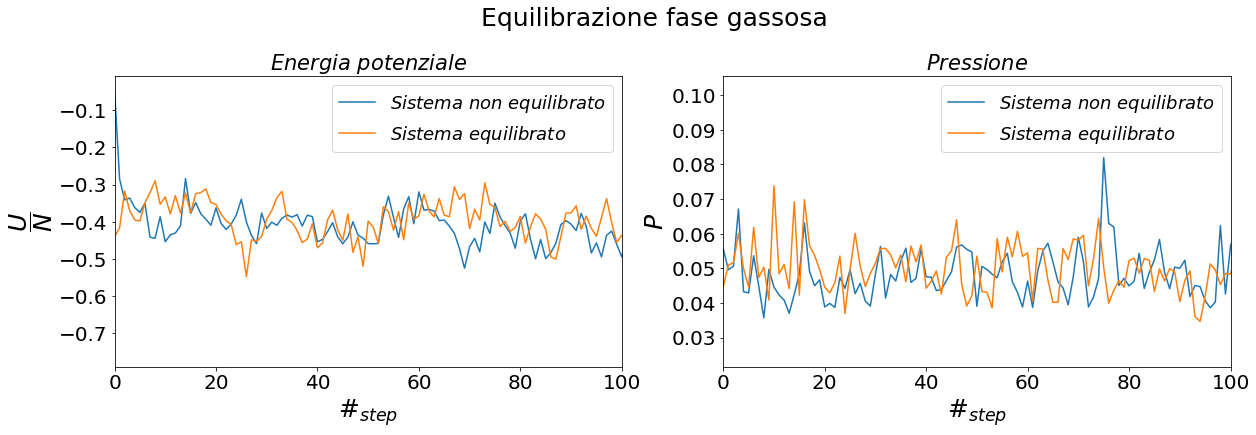

In [194]:
plt.figure(figsize=(20,12))

epot = np.loadtxt("MonteCarlo_NVT/Gas/instant_epot_neq.dat", usecols=(0), delimiter=' ', unpack='true')
press = np.loadtxt("MonteCarlo_NVT/Gas/instant_press_neq.dat", usecols=(0), delimiter=' ', unpack='true')
epot_eq = np.loadtxt("MonteCarlo_NVT/Gas/instant_epot_eq.dat", usecols=(0), delimiter=' ', unpack='true')
press_eq = np.loadtxt("MonteCarlo_NVT/Gas/instant_press_eq.dat", usecols=(0), delimiter=' ', unpack='true')
x=np.arange(len(epot_eq))
x_neq=np.arange(len(epot))
y=np.arange(len(press_eq))
y_neq=np.arange(len(epot))

plt.subplot(2,2,1)

plt.title('$Energia$ $potenziale$', fontsize=21)
plt.plot(x_neq, epot, label='$Sistema$ $non$ $equilibrato$')
plt.plot(x, epot_eq, label='$Sistema$ $equilibrato$')
plt.xlim(0,100)
plt.xlabel("$\#_{step}$", fontsize=25)
plt.ylabel('$\\dfrac{U}{N}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='best', fontsize=18)

plt.subplot(2,2,2)

plt.title('$Pressione$', fontsize=21)
plt.plot(y_neq,press, label='$Sistema$ $non$ $equilibrato$')
plt.plot(y,press_eq, label='$Sistema$ $equilibrato$')
plt.xlim(0,100)
plt.xlabel("$\#_{step}$", fontsize=25)
plt.ylabel('$P$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='best', fontsize=18)

plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.3)

plt.suptitle("Equilibrazione fase gassosa", fontsize=25)

plt.show()

1. Una volta ottenuti i valori istantanei dell'energia per particella e della pressione per il sistema equilibrato calcoliamo la **funzione di autocorrelazione** relativa a questi dati così da poter determinare quale debba essere la larghezza dei blocchi per ottenere delle configurazioni statisticamente indipendenti in modo tale da poter applicare il teorema del limite centrale e quindi il metodo della media a blocchi. La funzione di autocorrelazione di una certa quantità $\chi(t)$ dipendente dal tempo è definita come:

$$
\chi(t)=\frac{\frac{1}{t_{max}-t}  \sum_{t'=0}^{t_{max}-t} x(t') x(t'+t)  - \frac{1}{t_{max}-t} \sum_{t'=0}^{t_{max}-t} x(t') \cdot \frac{1}{t_{max}-t} \sum_{t'=0}^{t_{max}-t} x(t'+t)}{\frac{1}{t_{max}} \sum_{t'=0}^{t_{max}} x^2(t')  - (\frac{1}{t_{max}} \sum_{t'=0}^{t_{max}} x(t'))^2}
$$

nel nostro caso il tempo è rappresentato dagli step della simulazione.

#### Funzioni di autocorrelazione

In [128]:
t=np.arange(0, 300, 1)

epot_solid = np.loadtxt("MonteCarlo_NVT/Solido/instant_epot_eq.dat", usecols=(0), delimiter=' ', unpack='true')
press_solid = np.loadtxt("MonteCarlo_NVT/Solido/instant_press.dat", usecols=(0), delimiter=' ', unpack='true')

epot_liquid = np.loadtxt("MonteCarlo_NVT/Liquido/instant_epot_eq.dat", usecols=(0), delimiter=' ', unpack='true')
press_liquid = np.loadtxt("MonteCarlo_NVT/Liquido/instant_press_eq.dat", usecols=(0), delimiter=' ', unpack='true')

epot_gas = np.loadtxt("MonteCarlo_NVT/Gas/instant_epot_eq.dat", usecols=(0), delimiter=' ', unpack='true')
press_gas = np.loadtxt("MonteCarlo_NVT/Gas/instant_press_eq.dat", usecols=(0), delimiter=' ', unpack='true')

t_max=len(epot_solid)
p_max=len(press_solid)
autcr_solid = []
autcr_p_solid = []
autcr_liquid = []
autcr_p_liquid = []
autcr_gas = []
autcr_p_gas = []

#Energia stato solido
for i in t:
    sum_prod=0
    sum_mt=0
    sum_mtau=0
    sum_epot2=0
    sum_epot=0
    for t_i in range(0, t_max-i):
        sum_prod+=epot_solid[t_i]*epot_solid[t_i+i]
        sum_mt+=epot_solid[t_i]
        sum_mtau+=epot_solid[t_i+i]
    for t_ii in range(0, t_max):
        sum_epot2+=epot_solid[t_ii]*epot_solid[t_ii]
        sum_epot+=epot_solid[t_ii]
    auto_c_solid=np.array((1/(t_max-i) * sum_prod - 1/(t_max-i) * sum_mt * 1/(t_max-i) * sum_mtau)/(1/t_max * sum_epot2 - 1/t_max*1/t_max*sum_epot*sum_epot))
    autcr_solid.append(auto_c_solid)


#Energia stato liquido

for i in t:
    sum_prod=0
    sum_mt=0
    sum_mtau=0
    sum_epot2=0
    sum_epot=0
    for t_i in range(0, t_max-i):
        sum_prod+=epot_liquid[t_i]*epot_liquid[t_i+i]
        sum_mt+=epot_liquid[t_i]
        sum_mtau+=epot_liquid[t_i+i]
    for t_ii in range(0, t_max):
        sum_epot2+=epot_liquid[t_ii]*epot_liquid[t_ii]
        sum_epot+=epot_liquid[t_ii]
    auto_c_liquid=np.array((1/(t_max-i) * sum_prod - 1/(t_max-i) * sum_mt * 1/(t_max-i) * sum_mtau)/(1/t_max * sum_epot2 - 1/t_max*1/t_max*sum_epot*sum_epot))
    autcr_liquid.append(auto_c_liquid)



#Energia stato gassoso

for i in t:
    sum_prod=0
    sum_mt=0
    sum_mtau=0
    sum_epot2=0
    sum_epot=0
    for t_i in range(0, t_max-i):
        sum_prod+=epot_gas[t_i]*epot_gas[t_i+i]
        sum_mt+=epot_gas[t_i]
        sum_mtau+=epot_gas[t_i+i]
    for t_ii in range(0, t_max):
        sum_epot2+=epot_gas[t_ii]*epot_gas[t_ii]
        sum_epot+=epot_gas[t_ii]
    auto_c_gas=np.array((1/(t_max-i) * sum_prod - 1/(t_max-i) * sum_mt * 1/(t_max-i) * sum_mtau)/(1/t_max * sum_epot2 - 1/t_max*1/t_max*sum_epot*sum_epot))
    autcr_gas.append(auto_c_gas)
    #Pressione stato solido    

for i in t:
    sum_prod=0
    sum_mt=0
    sum_mtau=0
    sum_press2=0
    sum_press=0
    for t_i in range(0, p_max-i):
        sum_prod+=press_solid[t_i]*press_solid[t_i+i]
        sum_mt+=press_solid[t_i]
        sum_mtau+=press_solid[t_i+i]
    for t_ii in range(0, p_max):
        sum_press2+=press_solid[t_ii]*press_solid[t_ii]
        sum_press+=press_solid[t_ii]
    auto_cp_solid=np.array((1/(p_max-i) * sum_prod - 1/(p_max-i) * sum_mt * 1/(p_max-i) * sum_mtau)/(1/p_max * sum_press2 - 1/t_max*1/p_max*sum_press*sum_press))
    autcr_p_solid.append(auto_cp_solid) 

#Pressione stato liquido
    
for i in t:
    sum_prod=0
    sum_mt=0
    sum_mtau=0
    sum_press2=0
    sum_press=0
    for t_i in range(0, p_max-i):
        sum_prod+=press_liquid[t_i]*press_liquid[t_i+i]
        sum_mt+=press_liquid[t_i]
        sum_mtau+=press_liquid[t_i+i]
    for t_ii in range(0, p_max):
        sum_press2+=press_liquid[t_ii]*press_liquid[t_ii]
        sum_press+=press_liquid[t_ii]
    auto_cp_liquid=np.array((1/(p_max-i) * sum_prod - 1/(p_max-i) * sum_mt * 1/(p_max-i) * sum_mtau)/(1/p_max * sum_press2 - 1/t_max*1/p_max*sum_press*sum_press))
    autcr_p_liquid.append(auto_cp_liquid)

#Pressione stato gassoso  

for i in t:
    sum_prod=0
    sum_mt=0
    sum_mtau=0
    sum_press2=0
    sum_press=0
    for t_i in range(0, p_max-i):
        sum_prod+=press_gas[t_i]*press_gas[t_i+i]
        sum_mt+=press_gas[t_i]
        sum_mtau+=press_gas[t_i+i]
    for t_ii in range(0, p_max):
        sum_press2+=press_gas[t_ii]*press_gas[t_ii]
        sum_press+=press_gas[t_ii]
    auto_cp_gas=np.array((1/(p_max-i) * sum_prod - 1/(p_max-i) * sum_mt * 1/(p_max-i) * sum_mtau)/(1/p_max * sum_press2 - 1/t_max*1/p_max*sum_press*sum_press))
    autcr_p_gas.append(auto_cp_gas)

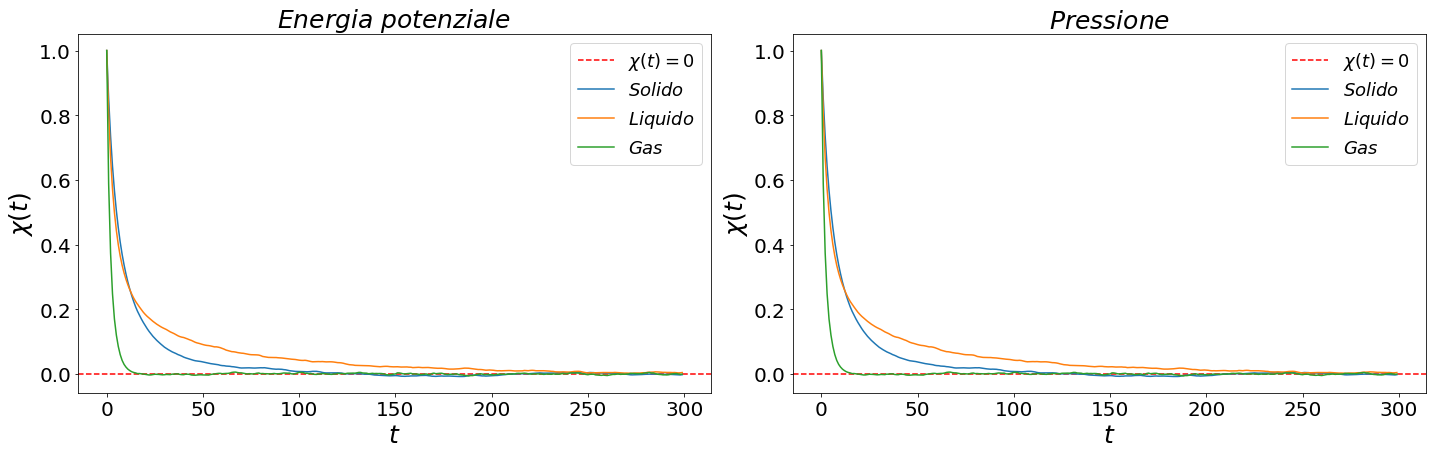

In [129]:
plt.figure(figsize=(20,14))
plt.subplot(2,2,1)

plt.title('$Energia$ $potenziale$', fontsize=25) 
plt.axhline(y=0, c='red', label='$\chi(t)=0$', linestyle='--') 
plt.ylabel('$\chi(t)$', fontsize=25)
plt.xlabel('$t$', fontsize=25) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(t, autcr_solid, label='$Solido$') 
plt.plot(t, autcr_liquid, label='$Liquido$')
plt.plot(t, autcr_gas, label='$Gas$')
plt.legend(loc='best', fontsize=18)



plt.subplot(2,2,2)

plt.title('$Pressione$', fontsize=25) 
plt.axhline(y=0, c='red', label='$\chi(t)=0$', linestyle='--') 
plt.ylabel('$\chi(t)$', fontsize=25)
plt.xlabel('$t$', fontsize=25) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
    
plt.plot(t, autcr_solid, label='$Solido$') 
plt.plot(t, autcr_liquid, label='$Liquido$')
plt.plot(t, autcr_gas, label='$Gas$')
plt.legend(loc='best', fontsize=18)


plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.5) 


plt.show()


Dai grafici precedenti si evince che le correlazioni tra i dati generati decadono dopo circa $300$ step della simulazione.

2. Utilizziamo ora gli stessi dati per analizzare il comportamento delle incertezze calcolate per i valori di aspettazione dell'energia potenziale per particella e della pressione al variare del numero di blocchi. Consideriamo blocchi che vanno da una lunghezza di $L=M/N=10$ a $L=5\times 10^3$, essendo $N$ il numero di blocchi ed $M=5\cdot 10^5$ il numero degli step Monte Carlo della simulazione.

Per visualizzare meglio l'andamento dei risultati ottenuti utilizziamo la scala logaritmica per l'asse $x$.

In [75]:
#Funzione per calcolo dell'errore
def error(ave, ave2, n):  
    if n==0:
        return 0
    else:
        return math.sqrt((ave2[n] - ave[n]**2)/n)

In [76]:
epot_solid = np.loadtxt("MonteCarlo_NVT/Solido/instant_epot_eq.dat", usecols=(0), delimiter=' ', unpack='true')
press_solid = np.loadtxt("MonteCarlo_NVT/Solido/instant_press_eq.dat", usecols=(0), delimiter=' ', unpack='true')
#Stato solido 
N=np.array([5*10**4, 25*10**3, 10**4, 5*10**3, 25*10**2, 10**3, 500, 250, 200, 100])
M=epot_solid.size
n=0
l=np.zeros(len(N))
last_ave_epot_solid=np.zeros(len(N))
last_err_epot_solid=np.zeros(len(N))

last_ave_press_solid=np.zeros(len(N))
last_err_press_solid=np.zeros(len(N))


for i in N:
    sum_epot=np.zeros(i)
    mean_epot=np.zeros(i)
    mean2_epot=np.zeros(i)
    prog_mean_epot=np.zeros(i)
    prog2_mean_epot=np.zeros(i)
    err_prog_epot=np.zeros(i)
    
    sum_press=np.zeros(i)
    mean_press=np.zeros(i)
    mean2_press=np.zeros(i)
    prog_mean_press=np.zeros(i)
    prog2_mean_press=np.zeros(i)
    err_prog_press=np.zeros(i)    
    L=int(M/i)
    
    for j in range(0,i):
        z=j*L
        for k in range(0,L):#Data blocking
            sum_epot[j]+= epot_solid[k+z]
            sum_press[j]+= press_solid[k+z]
        mean_epot[j]=sum_epot[j]/L
        mean2_epot[j]=mean_epot[j]**2
        
        mean_press[j]=sum_press[j]/L
        mean2_press[j]=mean_press[j]**2        
    #Calcolo delle medie cumulative
    for j in range(0,i):
        for k in range(j+1):
            prog_mean_epot[j] += mean_epot[k]
            prog2_mean_epot[j] += mean2_epot[k]
            
            prog_mean_press[j] += mean_press[k]
            prog2_mean_press[j] += mean2_press[k] 
            
        prog_mean_epot[j]/=(j+1)
        prog2_mean_epot[j]/=(j+1)
        err_prog_epot[j]=error(prog_mean_epot, prog2_mean_epot, j)
        
        prog_mean_press[j]/=(j+1)
        prog2_mean_press[j]/=(j+1)
        err_prog_press[j]=error(prog_mean_press, prog2_mean_press, j)        
    l[n]=L
    #Valori finali di epot e errore
    last_ave_epot_solid[n]=prog_mean_epot[j]
    last_err_epot_solid[n]=err_prog_epot[j]
    last_ave_press_solid[n]=prog_mean_press[j]
    last_err_press_solid[n]=err_prog_press[j]    
    n+=1

In [77]:
epot_liquid = np.loadtxt("MonteCarlo_NVT/Liquido/instant_epot_eq.dat", usecols=(0), delimiter=' ', unpack='true')
press_liquid = np.loadtxt("MonteCarlo_NVT/Liquido/instant_press_eq.dat", usecols=(0), delimiter=' ', unpack='true')
#Stato liquido

N=np.array([5*10**4, 25*10**3, 10**4, 5*10**3, 25*10**2, 10**3, 500, 250, 200, 100])
M=epot_liquid.size
n=0
l=np.zeros(len(N))
last_ave_epot_liquid=np.zeros(len(N))
last_err_epot_liquid=np.zeros(len(N))

last_ave_press_liquid=np.zeros(len(N))
last_err_press_liquid=np.zeros(len(N))


for i in N:
    sum_epot=np.zeros(i)
    mean_epot=np.zeros(i)
    mean2_epot=np.zeros(i)
    prog_mean_epot=np.zeros(i)
    prog2_mean_epot=np.zeros(i)
    err_prog_epot=np.zeros(i)
    
    sum_press=np.zeros(i)
    mean_press=np.zeros(i)
    mean2_press=np.zeros(i)
    prog_mean_press=np.zeros(i)
    prog2_mean_press=np.zeros(i)
    err_prog_press=np.zeros(i)    
    L=int(M/i)
    
    for j in range(0,i):
        z=j*L
        for k in range(0,L):#Data blocking
            sum_epot[j]+= epot_liquid[k+z]
            sum_press[j]+= press_liquid[k+z]
        mean_epot[j]=sum_epot[j]/L
        mean2_epot[j]=mean_epot[j]**2
        
        mean_press[j]=sum_press[j]/L
        mean2_press[j]=mean_press[j]**2        
    #Calcolo delle medie cumulative
    for j in range(0,i):
        for k in range(j+1):
            prog_mean_epot[j] += mean_epot[k]
            prog2_mean_epot[j] += mean2_epot[k]
            
            prog_mean_press[j] += mean_press[k]
            prog2_mean_press[j] += mean2_press[k] 
            
        prog_mean_epot[j]/=(j+1)
        prog2_mean_epot[j]/=(j+1)
        err_prog_epot[j]=error(prog_mean_epot, prog2_mean_epot, j)
        
        prog_mean_press[j]/=(j+1)
        prog2_mean_press[j]/=(j+1)
        err_prog_press[j]=error(prog_mean_press, prog2_mean_press, j)        
    l[n]=L
    #Valori finali di epot e errore
    last_ave_epot_liquid[n]=prog_mean_epot[j]
    last_err_epot_liquid[n]=err_prog_epot[j]
    last_ave_press_liquid[n]=prog_mean_press[j]
    last_err_press_liquid[n]=err_prog_press[j]    
    n+=1

In [195]:
epot_gas = np.loadtxt("MonteCarlo_NVT/Gas/instant_epot_eq.dat", usecols=(0), delimiter=' ', unpack='true')
press_gas = np.loadtxt("MonteCarlo_NVT/Gas/instant_press_eq.dat", usecols=(0), delimiter=' ', unpack='true')
#Stato gassoso 
N=np.array([5*10**4, 25*10**3, 10**4, 5*10**3, 25*10**2, 10**3, 500, 250, 200, 100])
M=epot_gas.size
n=0
l=np.zeros(len(N))
last_ave_epot_gas=np.zeros(len(N))
last_err_epot_gas=np.zeros(len(N))

last_ave_press_gas=np.zeros(len(N))
last_err_press_gas=np.zeros(len(N))


for i in N:
    sum_epot=np.zeros(i)
    mean_epot=np.zeros(i)
    mean2_epot=np.zeros(i)
    prog_mean_epot=np.zeros(i)
    prog2_mean_epot=np.zeros(i)
    err_prog_epot=np.zeros(i)
    
    sum_press=np.zeros(i)
    mean_press=np.zeros(i)
    mean2_press=np.zeros(i)
    prog_mean_press=np.zeros(i)
    prog2_mean_press=np.zeros(i)
    err_prog_press=np.zeros(i)    
    L=int(M/i)
    
    for j in range(0,i):
        z=j*L
        for k in range(0,L):#Data blocking
            sum_epot[j]+= epot_gas[k+z]
            sum_press[j]+= press_gas[k+z]
        mean_epot[j]=sum_epot[j]/L
        mean2_epot[j]=mean_epot[j]**2
        
        mean_press[j]=sum_press[j]/L
        mean2_press[j]=mean_press[j]**2        
    #Calcolo delle medie cumulative
    for j in range(0,i):
        for k in range(j+1):
            prog_mean_epot[j] += mean_epot[k]
            prog2_mean_epot[j] += mean2_epot[k]
            
            prog_mean_press[j] += mean_press[k]
            prog2_mean_press[j] += mean2_press[k] 
            
        prog_mean_epot[j]/=(j+1)
        prog2_mean_epot[j]/=(j+1)
        err_prog_epot[j]=error(prog_mean_epot, prog2_mean_epot, j)
        
        prog_mean_press[j]/=(j+1)
        prog2_mean_press[j]/=(j+1)
        err_prog_press[j]=error(prog_mean_press, prog2_mean_press, j)        
    l[n]=L
    #Valori finali di epot e errore
    last_ave_epot_gas[n]=prog_mean_epot[j]
    last_err_epot_gas[n]=err_prog_epot[j]
    last_ave_press_gas[n]=prog_mean_press[j]
    last_err_press_gas[n]=err_prog_press[j]    
    n+=1

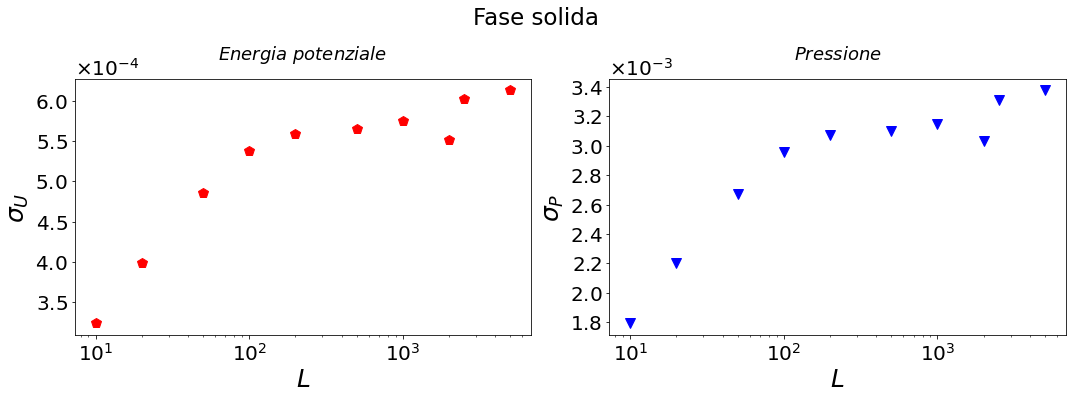

In [182]:
plt.figure(figsize=(15,5))

plt.suptitle("Fase solida", y=1.1,  fontsize=23)

plt1=plt.subplot(1,2,1)

plt.plot(l,last_err_epot_solid, 'p',label='$Energia$ $potenziale$', markersize=10, color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
#plt.xlim(0, 3000)
plt.xscale('log')
plt.xlabel('$L$', fontsize=25)
plt.ylabel('$\sigma_{U}$', fontsize=25)
plt1.yaxis.get_offset_text().set_fontsize(20)
#plt.legend(loc='best', fontsize=18)
plt.title('$Energia$ $potenziale$', y=1.05, fontsize=18)

plt2=plt.subplot(1,2,2)

plt.plot(l,last_err_press_solid, 'v', markersize=10, color='blue')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt2.yaxis.get_offset_text().set_fontsize(20)
#plt.xlim(0, 3000)
plt.xlabel('$L$', fontsize=25)
plt.ylabel('$\sigma_{P}$', fontsize=25)
plt.title('$Pressione$', y=1.05, fontsize=18)

plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.5) 


plt.show()

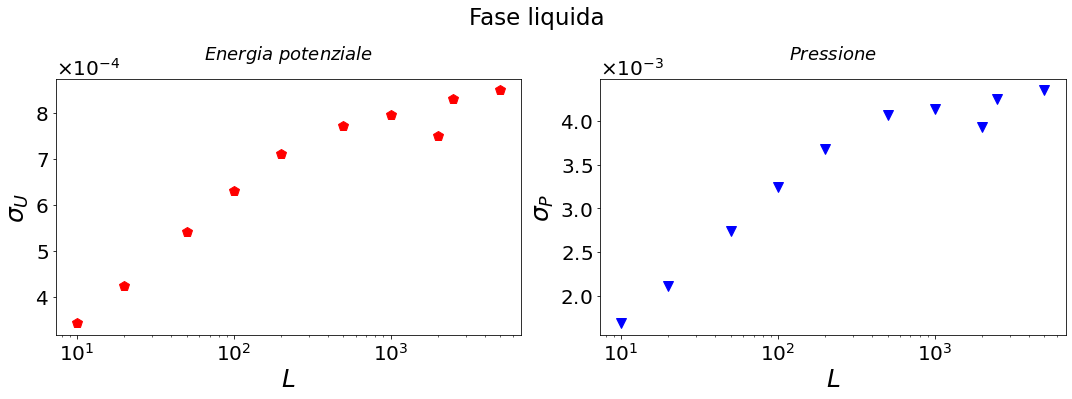

In [183]:
plt.figure(figsize=(15,5))

plt.suptitle("Fase liquida", y=1.1,  fontsize=23)

plt1=plt.subplot(1,2,1)

plt.plot(l,last_err_epot_liquid, 'p',label='$Energia$ $potenziale$', markersize=10, color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
#plt.xlim(0, 3000)
plt.xlabel('$L$', fontsize=25)
plt.ylabel('$\sigma_{U}$', fontsize=25)
#plt.legend(loc='best', fontsize=18)
plt1.yaxis.get_offset_text().set_fontsize(20)
plt.title('$Energia$ $potenziale$', y=1.05, fontsize=18)

plt2=plt.subplot(1,2,2)

plt.plot(l,last_err_press_liquid, 'v', markersize=10, color='blue')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
#plt.xlim(0, 3000)
plt.xlabel('$L$', fontsize=25)
plt.ylabel('$\sigma_{P}$', fontsize=25)
plt.title('$Pressione$', y=1.05, fontsize=18)
plt2.yaxis.get_offset_text().set_fontsize(20)

plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.5) 


plt.show()

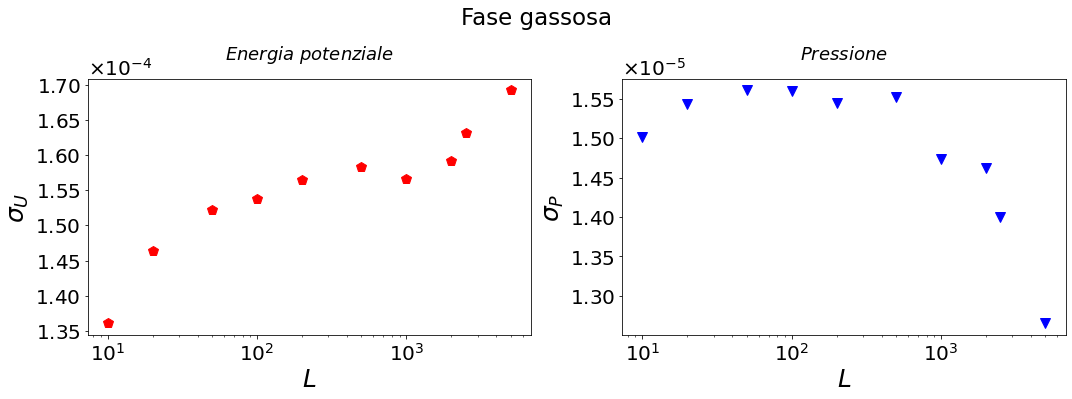

In [196]:
plt.figure(figsize=(15,5))

plt.suptitle("Fase gassosa", y=1.1,  fontsize=23)

plt1=plt.subplot(1,2,1)

plt.plot(l,last_err_epot_gas, 'p',label='$Energia$ $potenziale$', markersize=10, color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
#plt.xlim(0, 3000)
plt.xscale('log')
plt.xlabel('$L$', fontsize=25)
plt.ylabel('$\sigma_{U}$', fontsize=25)
plt1.yaxis.get_offset_text().set_fontsize(20)
#plt.legend(loc='best', fontsize=18)
plt.title('$Energia$ $potenziale$', y=1.05, fontsize=18)

plt2=plt.subplot(1,2,2)

plt.plot(l,last_err_press_gas, 'v', markersize=10, color='blue')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim(0, 3000)
plt.xscale('log')
plt.xlabel('$L$', fontsize=25)
plt.ylabel('$\sigma_{P}$', fontsize=25)
plt.title('$Pressione$', y=1.05, fontsize=18)
plt2.yaxis.get_offset_text().set_fontsize(20)

plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.5) 


plt.show()

Dall'andamento di questi grafici notiamo che inizialmente l'incertezza sulla misura aumenta con l'aumentare dell'ampiezza $L$ dei blocchi fino ad assestarsi intorno ad un valore circa costante per $L$ pari a $1000$. Scegliamo di conseguenza di utilizzare blocchi di lunghezza pari a $1000$ per calcolare la media a blocchi nelle successive simulazioni. 

### Esercizio 07.2

Introduciamo ora nel codice Monte Carlo NVT il calcolo della funzione di distribuzione radiale $g(r)$ in funzione della distanza radiale $r$ tra particelle con $r \in \left[ 0; L/2\right]$ dove $L$ è il lato della scatola ideale in cui sono contenute le particelle. Questa funzione fornisce la probabilità di trovare una coppia di atomi a distanza $r$ l'uno dall'altro rispetto alla probabilità attesa per una distribuzione completamente casuale alla stessa densità.

Questa quantità è definita come: 
$$
g(r)= \frac{1}{\rho N \Delta V(r)} \left \langle \sum \sum\limits_{i\neq j=1}^N \delta \left[ \left|\vec{r}\right | - \left | (\vec{r_i} - \vec{r_j})\right |\right] \right \rangle
$$
con $N$ numero di particelle, $\rho$ densità e $\Delta V(r) = \frac{4\pi}{3} \left [ (r+dr)^3 -r^3\right ]$.

### Esercizio 07.3

Includiamo il calcolo della funzione di distribuzione radiale $g(r)$ anche nel codice di dinamica molecolare.

### Esercizio 07.4


Utilizzando il codice Monte Carlo modificato equilibriamo un sistema di particelle di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) interagenti tramite un potenziale di Lennard-Jones nelle seguenti condizioni termodinamiche: 

1. **fase solida**: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. **fase liquida**: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. **fase gassosa**: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

Riportiamo di seguito i grafici dei valori medi dell'energia potenziale per particella, della pressione e della funzione di distribuzione radiale istantanea e con le relative incertezze ottenute con il metodo a blocchi in unità del Sistema Internazionale. Compariamo poi i risultati ottenuti mediante simulazione Monte Carlo con i risultati ottenuti tramite dinamica molecolare simulando il sistema nelle stesse condizioni termodinamiche.

L'equilibrazione dei sistemi simulati tramite codice di dinamica molecolare avviene con il metodo del restart descritto nell'esercitazione $4$.

Sia per il codice di dinamica molecolare che per il codice Monte Carlo scegliamo un numero di blocchi $N$ pari a $100$ e un numero di passi $L$ per ogni blocco pari a $1000$.

In [168]:
#Per il sistema internazionale: le energie vanno moltiplicate per epsilon, i tempi per sqrt(m*sigma^2/epsilon)
epsilon_kb=120
kb=1.38065*10**(-23)
epsilon=epsilon_kb*kb
mass=39.948*1.66*10**(-27)
sigma=0.34*10**(-9)
time=math.sqrt(mass*sigma**2/epsilon)
conv_press=epsilon/(pow(sigma,3))

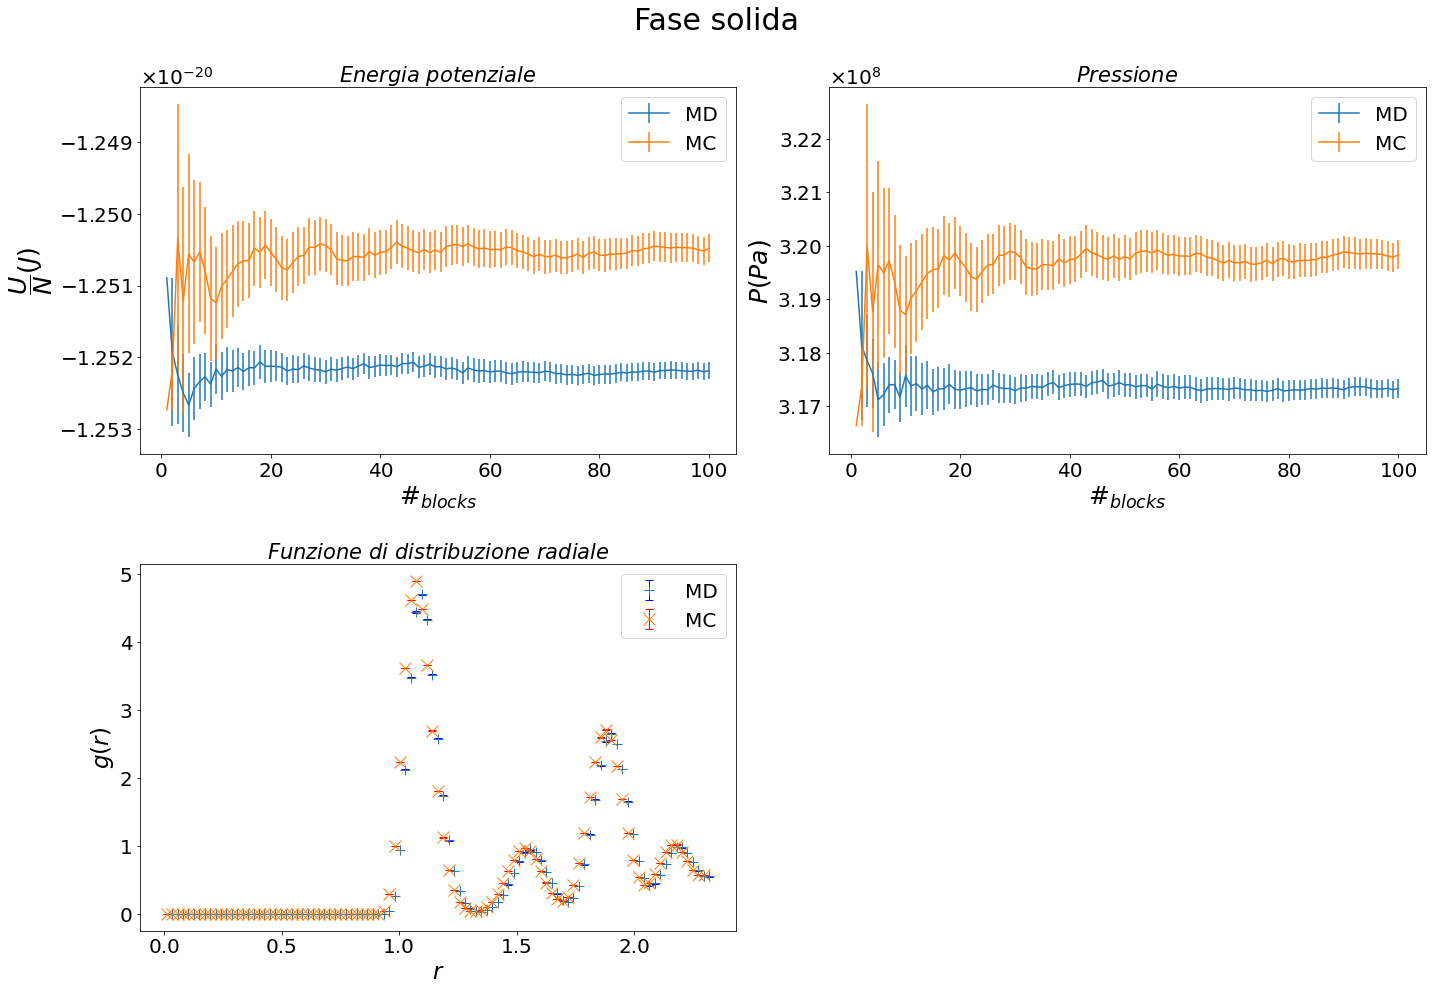

In [186]:
plt.figure(figsize=(20,14))

plt.suptitle("Fase solida", fontsize=30, y=0.98)

#Pressione e energia potenziale

plt1=plt.subplot(2,2,1)
#MD

plt.title('$Energia$ $potenziale$', fontsize=21)
blk, pot, errp= np.loadtxt("MolecularDynamics/Solido/output.epot.0", usecols=(0,2,3), delimiter=' ', unpack='true')
plt.errorbar(blk, pot*epsilon, yerr=errp*epsilon, label='MD')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.ylabel('$\\dfrac{U}{N}$$(J)$', fontsize=25)
plt.xlabel('$\#_{blocks}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
#MC
blk, pot, errp= np.loadtxt("MonteCarlo_NVT/Solido/output.epot.0", usecols=(0,2,3), delimiter=' ', unpack='true')
plt.errorbar(blk, pot*epsilon, yerr=errp*epsilon, label='MC')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.ylabel('$\\dfrac{U}{N}$$(J)$', fontsize=25)
plt.xlabel('$\#_{blocks}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
plt1.yaxis.get_offset_text().set_fontsize(20)


plt2=plt.subplot(2,2,2)

plt.title('$Pressione$', fontsize=21)
blk, press, errp = np.loadtxt("MolecularDynamics/Solido/output.press.0", usecols=(0,2,3), delimiter=' ', unpack='true')
plt.errorbar(blk, press*conv_press, yerr=errp*conv_press, label='MD')
plt.ylabel('$P$', fontsize=25)
plt.xlabel('$\#_{blocks}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)

blk, press, errp = np.loadtxt("MonteCarlo_NVT/Solido/output.pres.0", usecols=(0,2,3), delimiter=' ', unpack='true')
plt.errorbar(blk, press*conv_press, yerr=errp*conv_press, label='MC')
plt.ylabel('$P(Pa)$', fontsize=25)
plt.xlabel('$\#_{blocks}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt2.yaxis.get_offset_text().set_fontsize(20)


#Funzione di distribuzione radiale 
'''
plt.subplot(2,2,3)

#MD-MC gofr

blk, r, mean_dgir= np.loadtxt("MolecularDynamics/Solido/output.gofr.0", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.plot(r, mean_dgir, "o", label='MD')
plt.ylabel('$g(r)$', fontsize=23)
plt.xlabel('$r$', fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.title('$Valori$ $istantanei$', fontsize=20)

blk, r, mean_dgir= np.loadtxt("MonteCarlo_NVT/Solido/output.gofr.0", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.plot(r, mean_dgir, "o", label='MC')
plt.ylabel('$g(r)$', fontsize=23)
plt.xlabel('$r$', fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
'''
plt.subplot(2,2,3)

#MD-MC gave

r, gdir, err= np.loadtxt("MolecularDynamics/Solido/output.gave.0", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.title('$Funzione$ $di$ $distribuzione$ $radiale$', fontsize=21)
plt.errorbar(r, gdir, yerr=err, fmt='+', elinewidth=1, markersize=10, capsize=4, ecolor='blue', label='MD')
plt.ylabel('$g(r)$', fontsize=23)
plt.xlabel('$r$', fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)

r, gdir, err= np.loadtxt("MonteCarlo_NVT/Solido/output.gave.0", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.errorbar(r, gdir, yerr=err, fmt='x', elinewidth=1, markersize=12, capsize=4, ecolor='red', label='MC')
plt.ylabel('$g(r)$', fontsize=23)
plt.xlabel('$r$', fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)


plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.3)


plt.show()

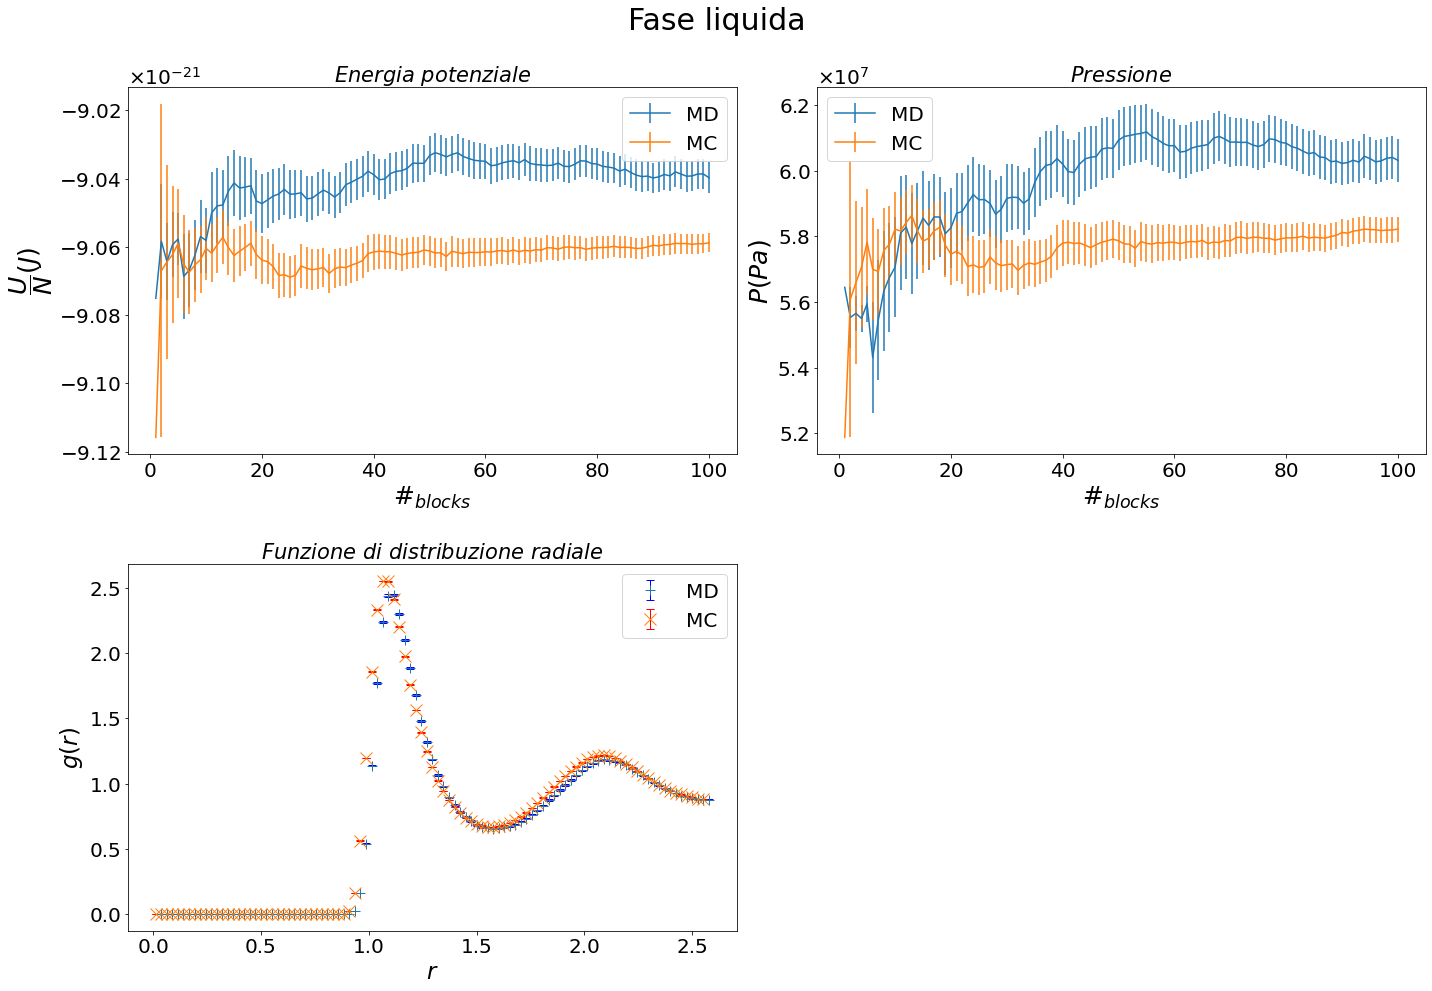

In [190]:
plt.figure(figsize=(20,14))

plt.suptitle("Fase liquida", fontsize=30, y=0.98)

#Pressione e energia potenziale

plt1=plt.subplot(2,2,1)
#MD
plt.title('$Energia$ $potenziale$', fontsize=21)
blk, pot, errp= np.loadtxt("MolecularDynamics/Liquido/output.epot.0", usecols=(0,2,3), delimiter=' ', unpack='true')
plt.errorbar(blk, pot*epsilon, yerr=errp*epsilon, label='MD')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.ylabel('$\\dfrac{U}{N}$$(J)$', fontsize=25)
plt.xlabel('$\#_{blocks}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
#MC
blk, pot, errp= np.loadtxt("MonteCarlo_NVT/Liquido/output.epot.0", usecols=(0,2,3), delimiter=' ', unpack='true')
plt.errorbar(blk, pot*epsilon, yerr=errp*epsilon, label='MC')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.ylabel('$\\dfrac{U}{N}$$(J)$', fontsize=25)
plt.xlabel('$\#_{blocks}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
plt1.yaxis.get_offset_text().set_fontsize(20)


plt2=plt.subplot(2,2,2)


plt.title('$Pressione$', fontsize=21)
blk, press, errp = np.loadtxt("MolecularDynamics/Liquido/output.press.0", usecols=(0,2,3), delimiter=' ', unpack='true')
plt.errorbar(blk, press*conv_press, yerr=errp*conv_press, label='MD')
plt.ylabel('$P$', fontsize=25)
plt.xlabel('$\#_{blocks}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)

blk, press, errp = np.loadtxt("MonteCarlo_NVT/Liquido/output.pres.0", usecols=(0,2,3), delimiter=' ', unpack='true')
plt.errorbar(blk, press*conv_press, yerr=errp*conv_press, label='MC')
plt.ylabel('$P(Pa)$', fontsize=25)
plt.xlabel('$\#_{blocks}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt2.yaxis.get_offset_text().set_fontsize(20)


#Funzione di distribuzione radiale 
'''
plt.subplot(2,2,3)

#MD-MC gofr

blk, r, mean_dgir= np.loadtxt("MolecularDynamics/Liquido/output.gofr.0", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.plot(r, mean_dgir, "o", label='MD')
plt.ylabel('$g(r)$', fontsize=23)
plt.xlabel('$r$', fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.title('$Valori$ $istantanei$', fontsize=20)

blk, r, mean_dgir= np.loadtxt("MonteCarlo_NVT/Liquido/output.gofr.0", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.plot(r, mean_dgir, "o", label='MC')
plt.ylabel('$g(r)$', fontsize=23)
plt.xlabel('$r$', fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
'''
plt.subplot(2,2,3)

#MD-MC gave

r, gdir, err= np.loadtxt("MolecularDynamics/Liquido/output.gave.0", usecols=(0, 1, 2), delimiter=' ', unpack='true')
plt.title('$Funzione$ $di$ $distribuzione$ $radiale$', fontsize=21)
plt.errorbar(r, gdir, yerr=err, fmt='+', elinewidth=1, markersize=10, capsize=4, ecolor='blue', label='MD')
plt.ylabel('$g(r)$', fontsize=23)
plt.xlabel('$r$', fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)

r, gdir, err= np.loadtxt("MonteCarlo_NVT/Liquido/output.gave.0", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.errorbar(r, gdir, yerr=err, fmt='x', elinewidth=1, markersize=12, capsize=4, ecolor='red', label='MC')
plt.ylabel('$g(r)$', fontsize=23)
plt.xlabel('$r$', fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)


plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.3)


plt.show()

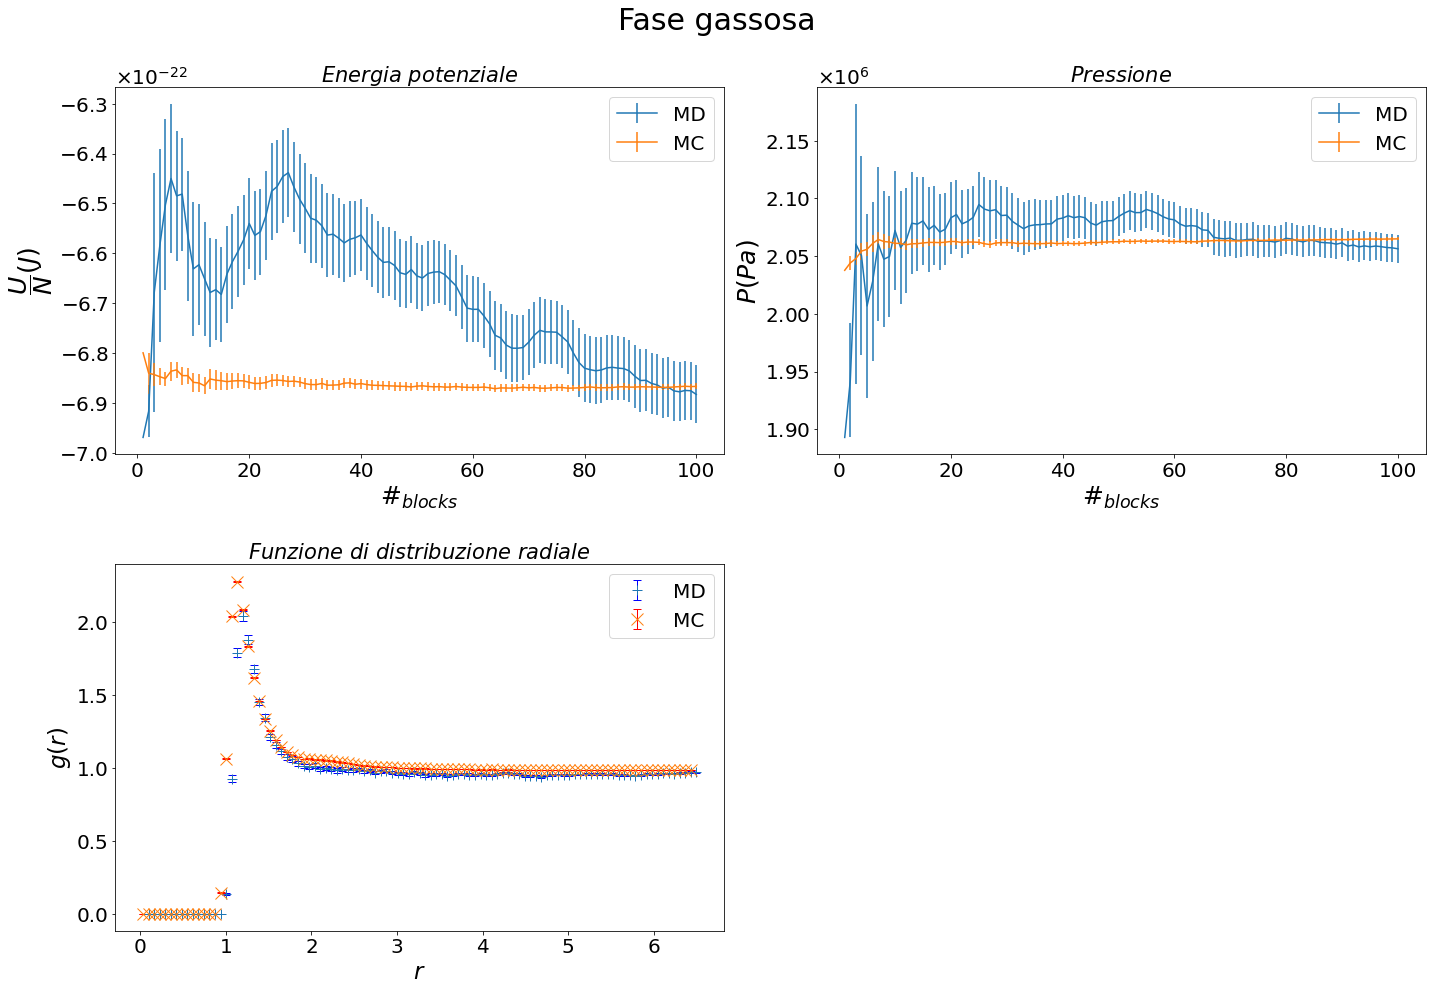

In [189]:
plt.figure(figsize=(20,14))

plt.suptitle("Fase gassosa", fontsize=30, y=0.98)


#Pressione e energia potenziale

plt1=plt.subplot(2,2,1)
#MD
plt.title('$Energia$ $potenziale$', fontsize=21)
blk, pot, errp= np.loadtxt("MolecularDynamics/Gas/output.epot.0", usecols=(0,2,3), delimiter=' ', unpack='true')
plt.errorbar(blk, pot*epsilon, yerr=errp*epsilon, label='MD')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.ylabel('$\\dfrac{U}{N}$$(J)$', fontsize=25)
plt.xlabel('$\#_{blocks}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
#MC
blk, pot, errp= np.loadtxt("MonteCarlo_NVT/Gas/output.epot.0", usecols=(0,2,3), delimiter=' ', unpack='true')
plt.errorbar(blk, pot*epsilon, yerr=errp*epsilon, label='MC')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.ylabel('$\\dfrac{U}{N}$$(J)$', fontsize=25)
plt.xlabel('$\#_{blocks}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
plt1.yaxis.get_offset_text().set_fontsize(20)


plt2=plt.subplot(2,2,2)

plt.title('$Pressione$', fontsize=21)
blk, press, errp = np.loadtxt("MolecularDynamics/Gas/output.press.0", usecols=(0,2,3), delimiter=' ', unpack='true')
plt.errorbar(blk, press*conv_press, yerr=errp*conv_press, label='MD')
plt.ylabel('$P$', fontsize=25)
plt.xlabel('$\#_{blocks}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)

blk, press, errp = np.loadtxt("MonteCarlo_NVT/Gas/output.pres.0", usecols=(0,2,3), delimiter=' ', unpack='true')
plt.errorbar(blk, press*conv_press, yerr=errp*conv_press, label='MC')
plt.ylabel('$P(Pa)$', fontsize=25)
plt.xlabel('$\#_{blocks}$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt2.yaxis.get_offset_text().set_fontsize(20)


#Funzione di distribuzione radiale 
'''
plt.subplot(2,2,3)

#MD-MC gofr

blk, r, mean_dgir= np.loadtxt("MolecularDynamics/Gas/output.gofr.0", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.plot(r, mean_dgir, "o", label='MD')
plt.ylabel('$g(r)$', fontsize=23)
plt.xlabel('$r$', fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.title('$Valori$ $istantanei$', fontsize=20)

blk, r, mean_dgir= np.loadtxt("MonteCarlo_NVT/Gas/output.gofr.0", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.plot(r, mean_dgir, "o", label='MC')
plt.ylabel('$g(r)$', fontsize=23)
plt.xlabel('$r$', fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)
'''
plt.subplot(2,2,3)

#MD-MC gave

r, gdir, err= np.loadtxt("MolecularDynamics/Gas/output.gave.0", usecols=(0, 1, 2), delimiter=' ', unpack='true')
plt.title('$Funzione$ $di$ $distribuzione$ $radiale$', fontsize=21)
plt.errorbar(r, gdir, yerr=err, fmt='+', elinewidth=1, markersize=10, capsize=4, ecolor='blue', label='MD')
plt.ylabel('$g(r)$', fontsize=23)
plt.xlabel('$r$', fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)


r, gdir, err= np.loadtxt("MonteCarlo_NVT/Gas/output.gave.0", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.errorbar(r, gdir, yerr=err, fmt='x', elinewidth=1, markersize=12, capsize=4, ecolor='red', label='MC')
plt.ylabel('$g(r)$', fontsize=23)
plt.xlabel('$r$', fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=20)


plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.3)


plt.show()

Dai grafici vediamo che i valori di pressione e energia potenziale ottenuti tramite simulazione Monte Carlo sono fedeli a quelli ottenuti tramite dinamica molecolare. L'andamento della funzione di distribuzione radiale per i tre stati ottenuti tramite simulazione Monte Carlo e dinamica molecolare coincidono tra di loro. Come ci aspettiamo vediamo che passando dallo stato solido a quello gassoso la pressione e l'energia potenziale per particella diminuiscono.